In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [2]:
train_df = pd.read_csv('C:\\Users\\singh\\OneDrive\\Desktop\\project\\train.csv')
test_df = pd.read_csv('C:\\Users\\singh\\OneDrive\\Desktop\\project\\test.csv')

Exploration

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()
print('_'*40)
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------    

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
def concat_df(test_data,train_data):
    return pd.concat([train_data,test_data], sort = True).reset_index(drop = True)
def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'],axis=1)

In [9]:
df_all = concat_df(train_df, test_df)
dfs = [train_df, test_df]

In [10]:
train_df.name = 'Training Set'
test_df.name = 'Test Set'
df_all.name = 'All Set'

# Data analysis

In [11]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.Name))
    display_missing(df)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column miss

In [12]:
#now lets see the null values we are required to handle
train_df.isnull().sum()/train_df.shape[0]#can we highlight some headings

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
#for test data I opted for the approach of using median derived from Pclass and Sex
age_by_pclass_sex = test_df.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(test_df['Age'].median()))

test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0


# Plotting and analysing

In [15]:
df_num = train_df[['Age','SibSp','Parch','Fare']]

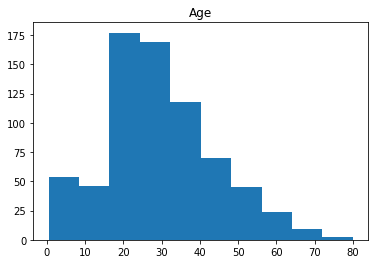

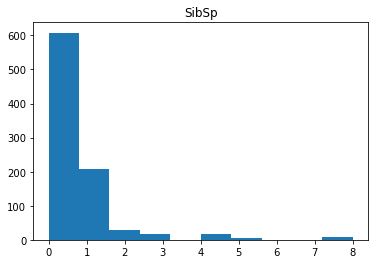

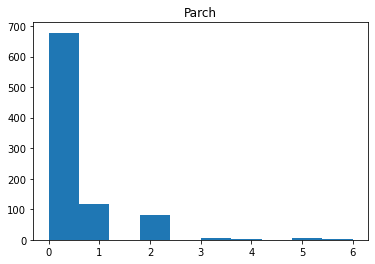

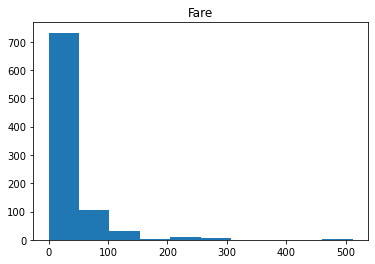

In [16]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Here the option of using the median seems very viable due to exisyence of skewness

<AxesSubplot:>

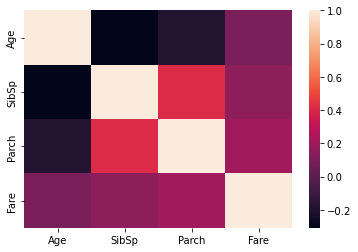

In [17]:
sns.heatmap(df_num.corr())

lets further get a pivot table for analysing the scenario of age numerically

In [18]:
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


here we see that parch and sibsb are highly coorelated i.e. parents and the kids were together at the time of sinking of the ship

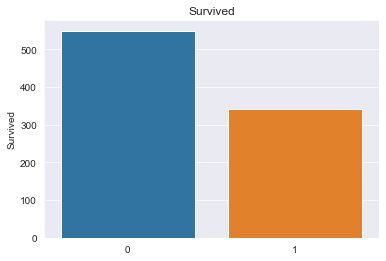

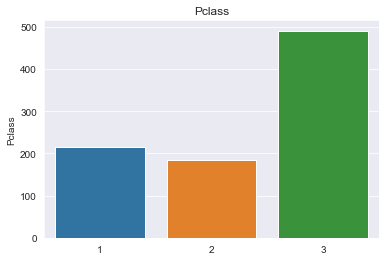

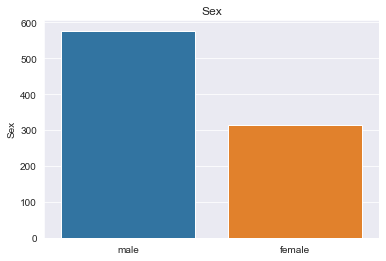

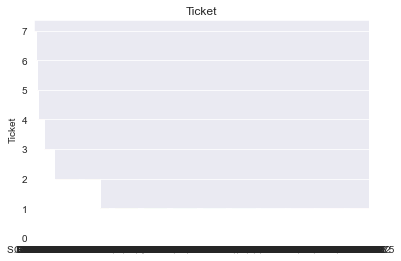

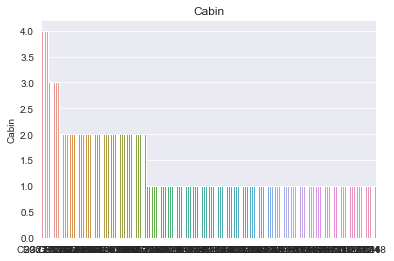

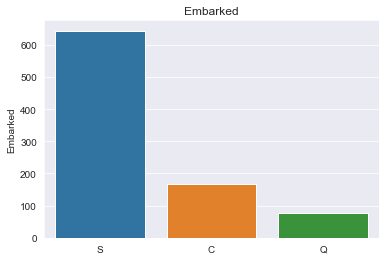

In [19]:
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
sns.set_style('darkgrid')
for i in df_cat.columns:
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

here cabin and ticket are not giving any information whatsoever and will require feature engineering and we will need to engineer the further apart from that we will use the info of S class of "embarked" for further allotment of missing values

now also see the relation of the factors with survival 

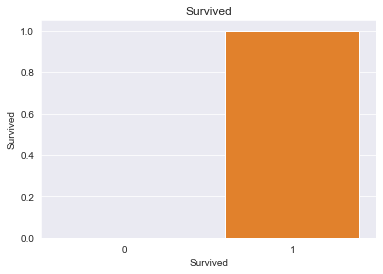

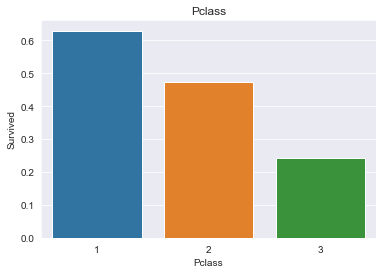

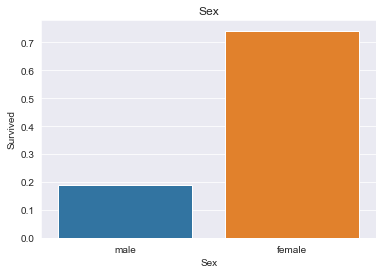

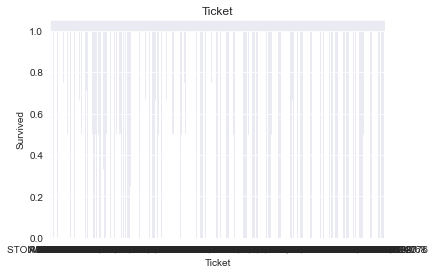

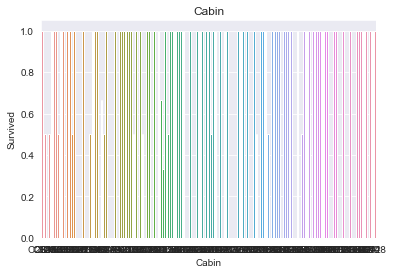

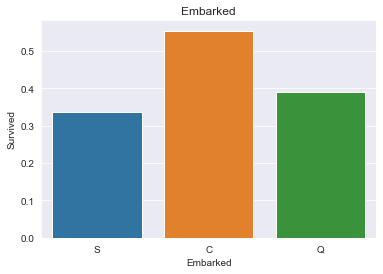

In [20]:
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
sns.set_style('darkgrid')
for i in df_cat.columns:
    sns.barplot(x = i,y = train_df["Survived"],ci = 0.75,saturation=0.75,data = df_cat).set_title(i)
    plt.show()

again same result for the survived and ticket column

In [21]:
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


the combined representation of numbers and graph will lead to the conclusion that better Pclass means higher survival chances and females weree better at surviving and embarked for "c" are the ones who were better at surviving 

now the cabin number is missing and almost 77% of data is missing which gives us two possibilities :-
i)Either the column for cabin number should be dropped or we could replace that column with a column for taking note of the fact whether "column number exists or not for a passenger". 

here i am thinking of first observing the plots and then trying to eliminate the required 

*In context of type of ticket purchased by the people

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

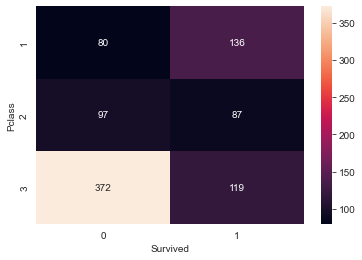

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Group the dataset by Pclass and Survived and then unstack them
group = train_df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*In context of age and gender

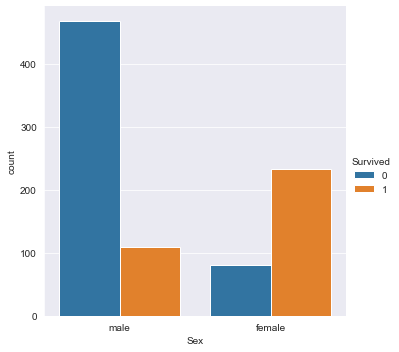

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

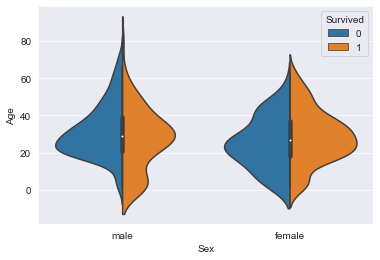

In [25]:
sns.set_color_codes(palette='dark')
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_df, split = True)

here from the plot we get some general but exoected outcomes as well

first of all we get maximux survivors are from age group of 20 to 40 and smaller kids and aged people have lower survival rate what so ever


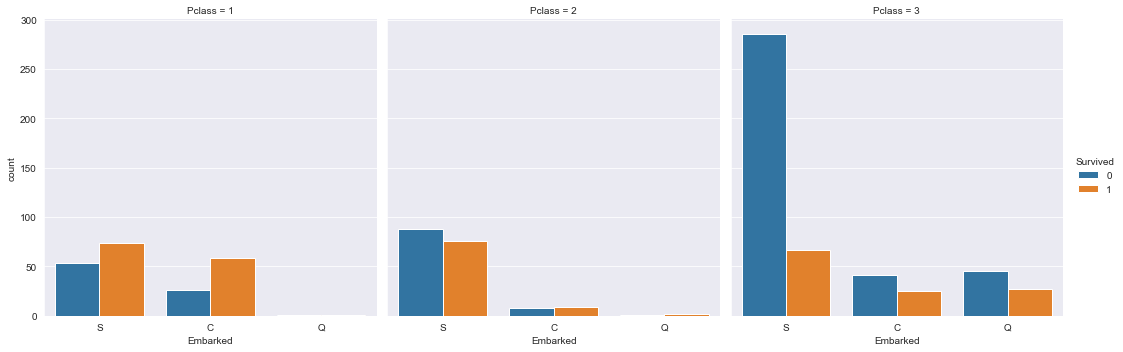

In [26]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_df)

now majority of passengers boarded from s therefore we will have higher accuracy by filling in the values from S in missing values
Also survival rates are good for p1 and p2 in S class although the others factors might be playing a game here too.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

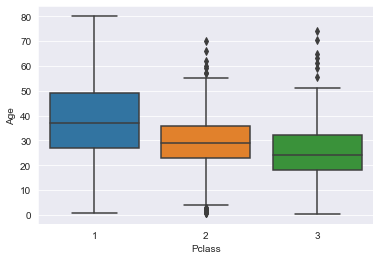

In [27]:
sns.boxplot(x = "Pclass",y = "Age",data = train_df)

In [28]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
#FOR pCLASS
model = ols('Survived ~ Pclass', data=train_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Pclass,24.142900,1.0,115.031272,2.537047e-25
Residual,186.584373,889.0,NaN,NaN


In [29]:
#FOR EMBARKED PLACE
model = ols('Survived ~ Embarked', data=train_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Embarked,6.256274,2.0,13.60527,0.000002
Residual,203.709980,886.0,NaN,NaN


In [30]:
#FOR GENDER
model = ols('Survived ~ Sex', data=train_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Sex,62.213165,1.0,372.405724,1.406066e-69
Residual,148.514108,889.0,NaN,NaN


In [31]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now in titanic we will have missing values in case of passenger class equals to 1 as people from class 2 and 3 were not given cabin at all so those are most rpobably unalotted values than being a missing value.

In [32]:
train_df['Data_Type'] = 'Train'
test_df['Data_Type'] = 'Test'
data = pd.concat([train_df, test_df])

# check missing values
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Data_Type         0
dtype: int64

In [33]:
data.shape

(1309, 13)

In [34]:
df_all.shape

(1309, 12)

now for preparing our test and train data by handling missing value i will be taking help of binnig so that label encoding and classification will be feasible

# Preparing test_data

In [35]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Data_Type'],
      dtype='object')

In [36]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Data_Type        0
dtype: int64

In [37]:
age_by_pclass_sex = test_df.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(test_df['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 25.0


In [38]:
age_bing = test_df['Age']

In [39]:
cut_bins = [0, 13, 28, 44, 80]
test_df['age_bin'] = pd.cut(df['Age'], bins=cut_bins)

In [40]:
test_df['age_bin']

0      (28, 44]
1      (44, 80]
2      (44, 80]
3      (13, 28]
4      (13, 28]
         ...   
413    (13, 28]
414    (28, 44]
415    (28, 44]
416    (13, 28]
417    (13, 28]
Name: age_bin, Length: 418, dtype: category
Categories (4, interval[int64, right]): [(0, 13] < (13, 28] < (28, 44] < (44, 80]]

In [41]:
ed_fare = test_df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(ed_fare)

In [42]:
test_df.drop(columns = 'Cabin')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Data_Type,age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Test,"(28, 44]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Test,"(44, 80]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Test,"(44, 80]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Test,"(13, 28]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Test,"(13, 28]"
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,Test,"(13, 28]"
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Test,"(28, 44]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Test,"(28, 44]"
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,Test,"(13, 28]"


In [43]:
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [44]:
#Create a new variable 'fare bin'
test_df.loc[(test_df['Fare'] == 0), 'fare bin'] = 0
test_df.loc[(test_df['Fare'] > 0) & 
             (test_df['Fare'] < 48), 'fare bin'] = 1
test_df.loc[test_df['Fare'] >= 48, 'fare bin'] = 2

In [45]:
test_df['fare bin']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
413    1.0
414    2.0
415    1.0
416    1.0
417    1.0
Name: fare bin, Length: 418, dtype: float64

# ticket no.

In [46]:
same_ticket = test_df.groupby('Ticket')['PassengerId'].nunique().reset_index()
same_ticket.rename(columns={'PassengerId': 'passenger count'}, inplace=True)

# Create a new variable 'travel size'
travel_group_2ppl = same_ticket[same_ticket['passenger count'] == 2]
travel_group_3ppl = same_ticket[same_ticket['passenger count'] == 3]
travel_group_4ppl = same_ticket[same_ticket['passenger count'] == 4]
travel_group_5ppl = same_ticket[same_ticket['passenger count'] >= 5]

test_df['travel size'] = 1
test_df.loc[test_df['Ticket'].isin(travel_group_2ppl['Ticket']), 
             'travel size'] = 2
test_df.loc[test_df['Ticket'].isin(travel_group_3ppl['Ticket']), 
             'travel size'] = 3
test_df.loc[test_df['Ticket'].isin(travel_group_4ppl['Ticket']), 
             'travel size'] = 4
test_df.loc[test_df['Ticket'].isin(travel_group_5ppl['Ticket']), 
             'travel size'] = 5

In [47]:
df[['travel size', 'SibSp']].groupby(['travel size']
                                          ).agg(['value_counts']).sort_index()

SibSp
                  value_counts
travel size SibSp             
1           0              250
            1               59
            2                8
            3                2
            4                2
2           0               23
            1               37
            2                3
            3                2
            5                1
3           0                6
            1                8
            2                2
            4                2
4           0                2
            1                4
            8                2
5           0                2
            1                2
            2                1

In [48]:
df_total1 = df

In [49]:
df_total1['family size'] = df_total1['SibSp'] + df_total1['Parch'] + 1

In [50]:
df_total1.loc[(df_total1['travel size'] == 1) & 
             (df_total1['SibSp'] == 1), 'travel size'] = 2
df_total1.loc[(df_total1['travel size'] == 1) & 
             (df_total1['SibSp'] == 2), 'travel size'] = 3
df_total1.loc[(df_total1['travel size'] == 1) & 
             (df_total1['SibSp'] == 4), 'travel size'] = 5
df_total1.loc[(df_total1['travel size'] == 2) & 
             (df_total1['SibSp'] == 2), 'travel size'] = 3
df_total1.loc[(df_total1['travel size'] == 2) & 
             (df_total1['SibSp'] == 3), 'travel size'] = 4
df_total1.loc[(df_total1['travel size'] == 3) & 
             (df_total1['SibSp'] == 3), 'travel size'] = 4

In [51]:
df_total1.loc[(df_total1['travel size'] == 1) & 
             (df_total1['Parch'] == 1), 'travel size'] = 2
df_total1.loc[(df_total1['travel size'] == 1) & 
             (df_total1['Parch'] == 2), 'travel size'] = 3
df_total1.loc[(df_total1['travel size'] == 1) & 
             (df_total1['Parch'] == 4), 'travel size'] = 5
df_total1.loc[(df_total1['travel size'] == 2) & 
             (df_total1['Parch'] == 2), 'travel size'] = 3
df_total1.loc[(df_total1['travel size'] == 2) & 
             (df_total1['Parch'] == 3), 'travel size'] = 4
df_total1.loc[(df_total1['travel size'] == 3) & 
             (df_total1['Parch'] == 3), 'travel size'] = 4

In [52]:
df_total1.loc[df_total1['travel size'] == 1, 
             'travel_type'] = 'a. alone'
df_total1.loc[(df_total1['travel size'] > 1) 
             & (df_total1['family size'] > 1), 'travel_type'] = 'b. with family'
df_total1.loc[(df_total1['travel size'] > 1) 
             & (df_total1['family size'] == 1), 'travel_type'] = 'c. with friend'


In [53]:
df_total1['title'] = test_df['Name'].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
df_total1['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: title, dtype: int64

In [54]:
df_total1['title_group'] = 'other'

for t in ['Mr','Miss','Mrs','Master']:
  test_df.loc[df_total1['title'] == t, 'title_group'] = t

In [55]:
df_mod = df_total1.copy()
df_mod.drop(columns=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','title','family size'], inplace=True)
df_mod.head()

,Pclass,Sex,Embarked,Data_Type,age_bin,fare bin,travel size,travel_type,title_group
0,3,male,Q,Test,"(28, 44]",1.0,1,a. alone,Mr
1,3,female,S,Test,"(44, 80]",1.0,2,b. with family,Mrs
2,2,male,Q,Test,"(44, 80]",1.0,1,a. alone,Mr
3,3,male,S,Test,"(13, 28]",1.0,1,a. alone,Mr
4,3,female,S,Test,"(13, 28]",1.0,2,b. with family,Mrs


In [56]:
df_mod.dtypes

Pclass            int64
Sex              object
Embarked         object
Data_Type        object
age_bin        category
fare bin        float64
travel size       int64
travel_type      object
title_group      object
dtype: object

In [57]:
embarked_train = pd.get_dummies(df_mod.Embarked)
embarked_train.columns = ['1_emb','2_emb','3_emb']
embarked_train.describe()

,1_emb,2_emb,3_emb
count,418.000000,418.000000,418.000000
mean,0.244019,0.110048,0.645933
std,0.430019,0.313324,0.478803
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [58]:
embarked_train

,1_emb,2_emb,3_emb
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [59]:
gender_train = pd.get_dummies(df_mod.Sex)
gender_train.columns = ['sex_female','sex_male']
gender_train.describe()

,sex_female,sex_male
count,418.000000,418.000000
mean,0.363636,0.636364
std,0.481622,0.481622
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [60]:
gender_train

,sex_female,sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [61]:
travel_type_train = pd.get_dummies(df_mod.travel_type)
travel_type_train.columns = ['alone','with_family','with_friends']
travel_type_train.describe()

,alone,with_family,with_friends
count,418.000000,418.000000,418.000000
mean,0.557416,0.392344,0.050239
std,0.497288,0.488858,0.218700
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [62]:
travel_type_train

,alone,with_family,with_friends
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
413,1,0,0
414,1,0,0
415,1,0,0
416,1,0,0


In [63]:
title_type_train = pd.get_dummies(df_mod.title_group)
title_type_train.columns = ['Master','Miss','Mr','Mrs','Other']
title_type_train.describe()

,Master,Miss,Mr,Mrs,Other
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.050239,0.186603,0.574163,0.172249,0.016746
std,0.218700,0.390059,0.495062,0.378049,0.128474
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
title_type_train

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
413,0,0,1,0,0
414,0,0,0,0,1
415,0,0,1,0,0
416,0,0,1,0,0


In [65]:
age_type_train = pd.get_dummies(df_mod.age_bin)
age_type_train.columns = ['1_bin_age','2_bin_age','3_bin_age','4_bin_age']
age_type_train.describe()

,1_bin_age,2_bin_age,3_bin_age,4_bin_age
count,418.000000,418.000000,418.000000,418.000000
mean,0.066986,0.533493,0.253589,0.145933
std,0.250297,0.499475,0.435586,0.353462
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [66]:
data_type_train = pd.get_dummies(df_mod.Data_Type)
data_type_train.columns = ['test']
data_type_train.describe()

,test
count,418.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [67]:
data_type_train[data_type_train>0] = 0

In [68]:
df_mod = pd.concat([df_mod,gender_train], axis = 1)

In [69]:
df_mod = pd.concat([df_mod,embarked_train], axis = 1)

In [70]:
df_mod = pd.concat([df_mod,age_type_train], axis = 1)

In [71]:
df_mod = pd.concat([df_mod,title_type_train], axis = 1)

In [72]:
df_mod = pd.concat([df_mod,travel_type_train], axis = 1)

In [73]:
df_mod = pd.concat([df_mod,data_type_train], axis = 1)

In [74]:
df_mod

,Pclass,Sex,Embarked,Data_Type,age_bin,fare bin,travel size,travel_type,title_group,sex_female,...,4_bin_age,Master,Miss,Mr,Mrs,Other,alone,with_family,with_friends,test
0,3,male,Q,Test,"(28, 44]",1.0,1,a. alone,Mr,0,...,0,0,0,1,0,0,1,0,0,0
1,3,female,S,Test,"(44, 80]",1.0,2,b. with family,Mrs,1,...,1,0,0,0,1,0,0,1,0,0
2,2,male,Q,Test,"(44, 80]",1.0,1,a. alone,Mr,0,...,1,0,0,1,0,0,1,0,0,0
3,3,male,S,Test,"(13, 28]",1.0,1,a. alone,Mr,0,...,0,0,0,1,0,0,1,0,0,0
4,3,female,S,Test,"(13, 28]",1.0,2,b. with family,Mrs,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,S,Test,"(13, 28]",1.0,1,a. alone,Mr,0,...,0,0,0,1,0,0,1,0,0,0
414,1,female,C,Test,"(28, 44]",2.0,1,a. alone,other,1,...,0,0,0,0,0,1,1,0,0,0
415,3,male,S,Test,"(28, 44]",1.0,1,a. alone,Mr,0,...,0,0,0,1,0,0,1,0,0,0
416,3,male,S,Test,"(13, 28]",1.0,1,a. alone,Mr,0,...,0,0,0,1,0,0,1,0,0,0


In [75]:
df_mod.drop(['Sex', 'Embarked', 'age_bin', 'travel_type', 'title_group', 'sex_female', '3_emb', '4_bin_age', 'Master', 'Miss', 'Mr', 'Mrs', 'with_friends','Data_Type'], axis=1, inplace = True)

In [76]:
df_mod

,Pclass,fare bin,travel size,sex_male,1_emb,2_emb,1_bin_age,2_bin_age,3_bin_age,Other,alone,with_family,test
0,3,1.0,1,1,0,1,0,0,1,0,1,0,0
1,3,1.0,2,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1,1,0,1,0,0,0,0,1,0,0
3,3,1.0,1,1,0,0,0,1,0,0,1,0,0
4,3,1.0,2,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1.0,1,1,0,0,0,1,0,0,1,0,0
414,1,2.0,1,0,1,0,0,0,1,1,1,0,0
415,3,1.0,1,1,0,0,0,0,1,0,1,0,0
416,3,1.0,1,1,0,0,0,1,0,0,1,0,0


In [77]:
df_mod.drop(['alone', 'with_family'], inplace = True, axis = 1)

# test data is prepared but only for kaggle competition but here we will use test train split

No man's land

In [78]:
def categorize_age(input_data, age_bin_size):
  i = 'a'
  for a in range(0,91,age_bin_size):
    input_data.loc[(input_data['Age'] >= a) & (input_data['Age'] < a+age_bin_size),
                   'age_bin'] = i + '. [' + str(a) + ',' + str(a+age_bin_size) + ')'
    i = chr(ord(i) + 1)
  input_data.loc[(input_data['Age'].isna()), 'age_bin'] = 'null'

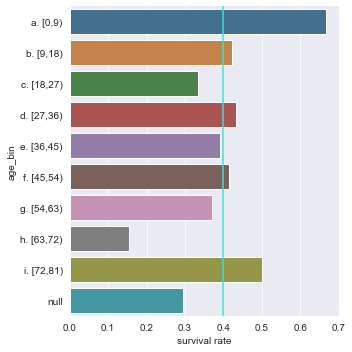

In [79]:
df = train_df.copy()
df['age_bin'] = None
categorize_age(df,9)
df['Survived'] = df['Survived'].astype(int)
age_dist = df.groupby(['age_bin'])['Survived'
                                  ].describe().reset_index().sort_values('age_bin')
g = sns.catplot(y='age_bin', x='mean', data=age_dist, saturation=.5, kind='bar', ci=None)
g.set_xlabels('survival rate')
plt.axvline(0.4, 0, 3, color='turquoise');

In [80]:
age_data = df[['Age','Survived']].dropna()
kmeans = KMeans(n_clusters=4, random_state=0).fit(age_data)
age_group = kmeans.labels_
age_data['age_bin'] = age_group

In [81]:
age_min = age_data.groupby('age_bin')['Age'].min().reset_index()
age_min.rename(columns={'Age': 'minimum age'}, inplace=True)
age_max = age_data.groupby('age_bin')['Age'].max().reset_index()
age_max.rename(columns={'Age': 'maximum age'}, inplace=True)
age_bins = pd.merge(age_min, age_max, on='age_bin')
age_bins

,age_bin,minimum age,maximum age
0,0,28.50,44.0
1,1,0.42,13.0
2,2,45.00,80.0
3,3,14.00,28.0


In [82]:
age_data.groupby('age_bin')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin,,,,,,,,
0,237.0,0.417722,0.494228,0.0,0.0,0.0,1.0,1.0
1,71.0,0.591549,0.495046,0.0,0.0,1.0,1.0,1.0
2,115.0,0.373913,0.485958,0.0,0.0,0.0,1.0,1.0
3,291.0,0.364261,0.482051,0.0,0.0,0.0,1.0,1.0


In [83]:
df.loc[df['Age'] <= 13, 'age_bin'] = 'a. [0,13]'
df.loc[(df['Age'] > 13) & (df['Age'] <= 28), 'age_bin'] = 'b. (13,28]'
df.loc[(df['Age'] > 28) & (df['Age'] <= 44), 'age_bin'] = 'c. (28,44]'
df.loc[df['Age'] > 44, 'age_bin'] = 'd. (44,80]'
df.loc[df['Age'].isna(), 'age_bin'] = 'e. null'

In [84]:
df.groupby('age_bin')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin,,,,,,,,
"a. [0,13]",71.0,0.591549,0.495046,0.0,0.0,1.0,1.0,1.0
"b. (13,28]",291.0,0.364261,0.482051,0.0,0.0,0.0,1.0,1.0
"c. (28,44]",237.0,0.417722,0.494228,0.0,0.0,0.0,1.0,1.0
"d. (44,80]",115.0,0.373913,0.485958,0.0,0.0,0.0,1.0,1.0
e. null,177.0,0.293785,0.456787,0.0,0.0,0.0,1.0,1.0


In [85]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Data_Type,age_bin


In [86]:
data = pd.concat([train_df, test_df])

In [87]:
df.loc[df['PassengerId'] == '1044', 'Fare'
            ] = data[data['Pclass']=='3']['Fare'].mean()

In [88]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Data_Type        0
age_bin          0
dtype: int64

In [89]:
fare_data = df[['Fare','Survived']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(fare_data)
fare_group = kmeans.labels_
fare_data['fare bin'] = fare_group

# Create a new variable 'fare bin'
df.loc[(df['Fare'] == 0), 'fare bin'] = 0
df.loc[(df['Fare'] > 0) & 
             (df['Fare'] < 48), 'fare bin'] = 1
df.loc[df['Fare'] >= 48, 'fare bin'] = 2

# testing

In [90]:
#fare_data

In [91]:
df.loc[df['Embarked'].isna(), 'Embarked'] = 'S'

# TICKET NUMBER

In [92]:
same_ticket = df.groupby('Ticket')['PassengerId'].nunique().reset_index()
same_ticket.rename(columns={'PassengerId': 'passenger count'}, inplace=True)

# Create a new variable 'travel size'
travel_group_2ppl = same_ticket[same_ticket['passenger count'] == 2]
travel_group_3ppl = same_ticket[same_ticket['passenger count'] == 3]
travel_group_4ppl = same_ticket[same_ticket['passenger count'] == 4]
travel_group_5ppl = same_ticket[same_ticket['passenger count'] >= 5]

df['travel size'] = 1
df.loc[df['Ticket'].isin(travel_group_2ppl['Ticket']), 
             'travel size'] = 2
df.loc[df['Ticket'].isin(travel_group_3ppl['Ticket']), 
             'travel size'] = 3
df.loc[df['Ticket'].isin(travel_group_4ppl['Ticket']), 
             'travel size'] = 4
df.loc[df['Ticket'].isin(travel_group_5ppl['Ticket']), 
             'travel size'] = 5
df.groupby(['travel size'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
travel size,,,,,,,,
1,547.0,0.297989,0.457793,0.0,0.0,0.0,1.0,1.0
2,188.0,0.574468,0.495744,0.0,0.0,1.0,1.0,1.0
3,63.0,0.698413,0.462633,0.0,0.0,1.0,1.0,1.0
4,44.0,0.500000,0.505781,0.0,0.0,0.5,1.0,1.0
5,49.0,0.102041,0.305839,0.0,0.0,0.0,0.0,1.0


In [93]:
df[['travel size', 'SibSp']].groupby(['travel size']
                                          ).agg(['value_counts']).sort_index()

SibSp
                  value_counts
travel size SibSp             
1           0              482
            1               57
            2                7
            4                1
2           0               71
            1              103
            2               12
            3                2
3           0               32
            1               30
            2                1
4           0               12
            1               14
            2                5
            3               10
            4                3
5           0               11
            1                5
            2                3
            3                4
            4               14
            5                5
            8                7

som people travelled without taking same tickets even when they were family


In [94]:
df_total = df

In [95]:
df_total['family size'] = df_total['SibSp'] + df_total['Parch'] + 1

In [96]:
df_total.loc[(df_total['travel size'] == 1) & 
             (df_total['SibSp'] == 1), 'travel size'] = 2
df_total.loc[(df_total['travel size'] == 1) & 
             (df_total['SibSp'] == 2), 'travel size'] = 3
df_total.loc[(df_total['travel size'] == 1) & 
             (df_total['SibSp'] == 4), 'travel size'] = 5
df_total.loc[(df_total['travel size'] == 2) & 
             (df_total['SibSp'] == 2), 'travel size'] = 3
df_total.loc[(df_total['travel size'] == 2) & 
             (df_total['SibSp'] == 3), 'travel size'] = 4
df_total.loc[(df_total['travel size'] == 3) & 
             (df_total['SibSp'] == 3), 'travel size'] = 4

In [97]:
df_total.loc[(df_total['travel size'] == 1) & 
             (df_total['Parch'] == 1), 'travel size'] = 2
df_total.loc[(df_total['travel size'] == 1) & 
             (df_total['Parch'] == 2), 'travel size'] = 3
df_total.loc[(df_total['travel size'] == 1) & 
             (df_total['Parch'] == 4), 'travel size'] = 5
df_total.loc[(df_total['travel size'] == 2) & 
             (df_total['Parch'] == 2), 'travel size'] = 3
df_total.loc[(df_total['travel size'] == 2) & 
             (df_total['Parch'] == 3), 'travel size'] = 4
df_total.loc[(df_total['travel size'] == 3) & 
             (df_total['Parch'] == 3), 'travel size'] = 4

In [98]:
df_total.loc[df_total['travel size'] == 1, 
             'travel_type'] = 'a. alone'
df_total.loc[(df_total['travel size'] > 1) 
             & (df_total['family size'] > 1), 'travel_type'] = 'b. with family'
df_total.loc[(df_total['travel size'] > 1) 
             & (df_total['family size'] == 1), 'travel_type'] = 'c. with friend'

# Survival rate by travel type
df_total.groupby(['travel_type'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
travel_type,,,,,,,,
a. alone,462.0,0.270563,0.444732,0.0,0.0,0.0,1.0,1.0
b. with family,354.0,0.505650,0.500676,0.0,0.0,1.0,1.0,1.0
c. with friend,75.0,0.506667,0.503322,0.0,0.0,1.0,1.0,1.0


# Title

In [99]:
df_total['title'] = df['Name'].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
df_total['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

here mainly four can be grouped else all others can be taken in other catgories due to the first four title's sheer numbers

In [100]:
df_total['title_group'] = 'other'

for t in ['Mr','Miss','Mrs','Master']:
  df.loc[df_total['title'] == t, 'title_group'] = t

df_total.groupby(['title_group'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
title_group,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.0,1.0
Miss,182.0,0.697802,0.460477,0.0,0.0,1.0,1.0,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.0,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.0,1.0,1.0,1.0
other,27.0,0.444444,0.506370,0.0,0.0,0.0,1.0,1.0


# FEATURE SELECTION AND ONE-HOT ENCODING

I dropped SibSp and Parch because they are probably be highly correlated with travel size.
also used .get_dummies for easy encoding

In [101]:
df_model = df_total.copy()
df_model.drop(columns=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','title','family size'], inplace=True)
df_model.head()

,Survived,Pclass,Sex,Embarked,Data_Type,age_bin,fare bin,travel size,travel_type,title_group
0,0,3,male,S,Train,"b. (13,28]",1.0,2,b. with family,Mr
1,1,1,female,C,Train,"c. (28,44]",2.0,2,b. with family,Mrs
2,1,3,female,S,Train,"b. (13,28]",1.0,1,a. alone,Miss
3,1,1,female,S,Train,"c. (28,44]",2.0,2,b. with family,Mrs
4,0,3,male,S,Train,"c. (28,44]",1.0,1,a. alone,Mr


In [102]:
df_model.dtypes

Survived         int32
Pclass           int64
Sex             object
Embarked        object
Data_Type       object
age_bin         object
fare bin       float64
travel size      int64
travel_type     object
title_group     object
dtype: object

In [103]:
embarked_train = pd.get_dummies(df_model.Embarked)
embarked_train.columns = ['1_emb','2_emb','3_emb']
embarked_train.describe()

,1_emb,2_emb,3_emb
count,891.000000,891.000000,891.000000
mean,0.188552,0.086420,0.725028
std,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [104]:
embarked_train

,1_emb,2_emb,3_emb
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [105]:
gender_train = pd.get_dummies(df_model.Sex)
gender_train.columns = ['sex_female','sex_male']
gender_train.describe()

,sex_female,sex_male
count,891.000000,891.000000
mean,0.352413,0.647587
std,0.477990,0.477990
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [106]:
gender_train

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [107]:
travel_type_train = pd.get_dummies(df_model.travel_type)
travel_type_train.columns = ['alone','with_family','with_friends']
travel_type_train.describe()

,alone,with_family,with_friends
count,891.000000,891.000000,891.000000
mean,0.518519,0.397306,0.084175
std,0.499938,0.489615,0.277806
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [108]:
travel_type_train

,alone,with_family,with_friends
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
886,1,0,0
887,1,0,0
888,0,1,0
889,1,0,0


In [109]:
title_type_train = pd.get_dummies(df_model.title_group)
title_type_train.columns = ['Master','Miss','Mr','Mrs','Other']
title_type_train.describe()

,Master,Miss,Mr,Mrs,Other
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.044893,0.204265,0.580247,0.140292,0.030303
std,0.207186,0.403390,0.493796,0.347485,0.171516
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
title_type_train

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [111]:
df_model.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Data_Type', 'age_bin',
       'fare bin', 'travel size', 'travel_type', 'title_group'],
      dtype='object')

In [112]:
age_type_train = pd.get_dummies(df_model.age_bin)
age_type_train.columns = ['1_bin_age','2_bin_age','3_bin_age','4_bin_age','null_bin_age']
age_type_train.describe()

,1_bin_age,2_bin_age,3_bin_age,4_bin_age,null_bin_age
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.079686,0.326599,0.265993,0.129068,0.198653
std,0.270958,0.469233,0.442109,0.335464,0.399210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
age_type_train

,1_bin_age,2_bin_age,3_bin_age,4_bin_age,null_bin_age
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,1,0,0,0
887,0,1,0,0,0
888,0,0,0,0,1
889,0,1,0,0,0


In [114]:
df_model = pd.concat([df_model,gender_train], axis = 1)

In [115]:
df_model = pd.concat([df_model,embarked_train], axis = 1)

In [116]:
df_model = pd.concat([df_model,age_type_train], axis = 1)

In [117]:
df_model = pd.concat([df_model,title_type_train], axis = 1)

In [118]:
df_model = pd.concat([df_model,travel_type_train], axis = 1)

In [119]:
df_model

,Survived,Pclass,Sex,Embarked,Data_Type,age_bin,fare bin,travel size,travel_type,title_group,...,4_bin_age,null_bin_age,Master,Miss,Mr,Mrs,Other,alone,with_family,with_friends
0,0,3,male,S,Train,"b. (13,28]",1.0,2,b. with family,Mr,...,0,0,0,0,1,0,0,0,1,0
1,1,1,female,C,Train,"c. (28,44]",2.0,2,b. with family,Mrs,...,0,0,0,0,0,1,0,0,1,0
2,1,3,female,S,Train,"b. (13,28]",1.0,1,a. alone,Miss,...,0,0,0,1,0,0,0,1,0,0
3,1,1,female,S,Train,"c. (28,44]",2.0,2,b. with family,Mrs,...,0,0,0,0,0,1,0,0,1,0
4,0,3,male,S,Train,"c. (28,44]",1.0,1,a. alone,Mr,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,S,Train,"b. (13,28]",1.0,1,a. alone,other,...,0,0,0,0,0,0,1,1,0,0
887,1,1,female,S,Train,"b. (13,28]",1.0,1,a. alone,Miss,...,0,0,0,1,0,0,0,1,0,0
888,0,3,female,S,Train,e. null,1.0,3,b. with family,Miss,...,0,1,0,1,0,0,0,0,1,0
889,1,1,male,C,Train,"b. (13,28]",1.0,1,a. alone,Mr,...,0,0,0,0,1,0,0,1,0,0


In [120]:
data_type_train = pd.get_dummies(df_model.Data_Type)
data_type_train.columns = ['test']
data_type_train.describe()

,test
count,891.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [121]:
df_model = pd.concat([df_model,data_type_train], axis = 1)

In [122]:
df_model.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Data_Type', 'age_bin',
       'fare bin', 'travel size', 'travel_type', 'title_group', 'sex_female',
       'sex_male', '1_emb', '2_emb', '3_emb', '1_bin_age', '2_bin_age',
       '3_bin_age', '4_bin_age', 'null_bin_age', 'Master', 'Miss', 'Mr', 'Mrs',
       'Other', 'alone', 'with_family', 'with_friends', 'test'],
      dtype='object')

In [123]:
df_model.drop(['Sex', 'Embarked', 'age_bin', 'travel_type', 'title_group', 'sex_female', '3_emb', '4_bin_age', 'Master', 'Miss', 'Mr', 'Mrs', 'with_friends','Data_Type'], axis=1, inplace = True)

In [124]:
df_model.columns

Index(['Survived', 'Pclass', 'fare bin', 'travel size', 'sex_male', '1_emb',
       '2_emb', '1_bin_age', '2_bin_age', '3_bin_age', 'null_bin_age', 'Other',
       'alone', 'with_family', 'test'],
      dtype='object')

here we have taken one less than the required as 0 0 will automatically correspond to the left out column 

In [125]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [126]:
rows= []
data_corr = df_model.drop(columns={'test'})

for var1 in data_corr:
  col = []
  for var2 in data_corr :
    cramers =cramers_v(data_corr[var1], data_corr[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
output_corr = pd.DataFrame(cramers_results, columns = data_corr.columns, 
                           index =data_corr.columns)

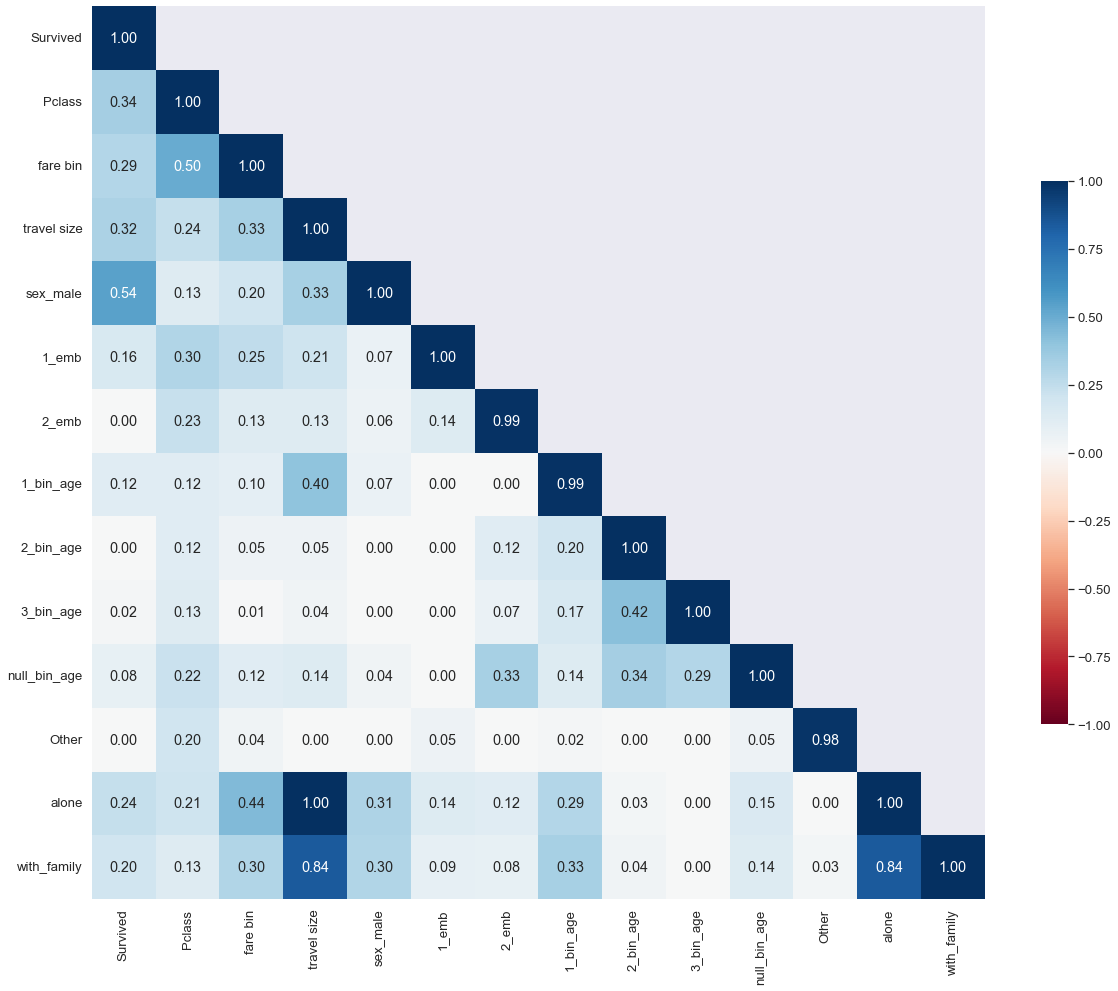

In [127]:
# Visualize correlation
sns.set_theme(style="white")
sns.set(font_scale = 1.2)
corr = output_corr #data_dummies[['Pclass','fare group','travel group']].corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool),+1)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt=".2f", 
           square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
#Apply xticks
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns)
#Apply yticks
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns)
#show plot
plt.show()

Here we also can see that the travel type and travel size are highly correlated therefore drop em

In [128]:
df_model.drop(['alone', 'with_family'], inplace = True, axis = 1)

In [129]:
df_model.columns

Index(['Survived', 'Pclass', 'fare bin', 'travel size', 'sex_male', '1_emb',
       '2_emb', '1_bin_age', '2_bin_age', '3_bin_age', 'null_bin_age', 'Other',
       'test'],
      dtype='object')

In [130]:
train_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# NOW FOR THE CABIN 


now here as well we can see that alot of values are missing but this can also mean that they are missing for a reason 

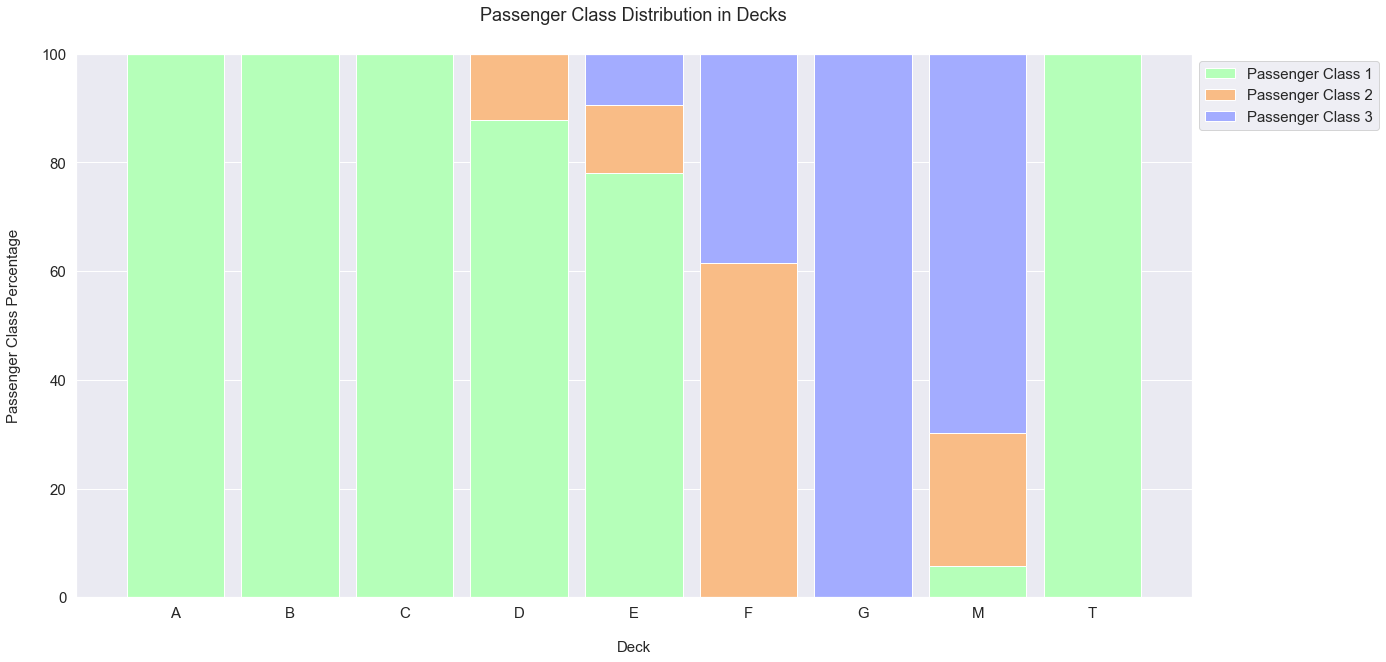

In [131]:
train_df['Deck'] = train_df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = train_df.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    bar_width = 0.85
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [132]:
idx = train_df[train_df['Deck'] == 'T'].index
train_df.loc[idx, 'Deck'] = 'A'

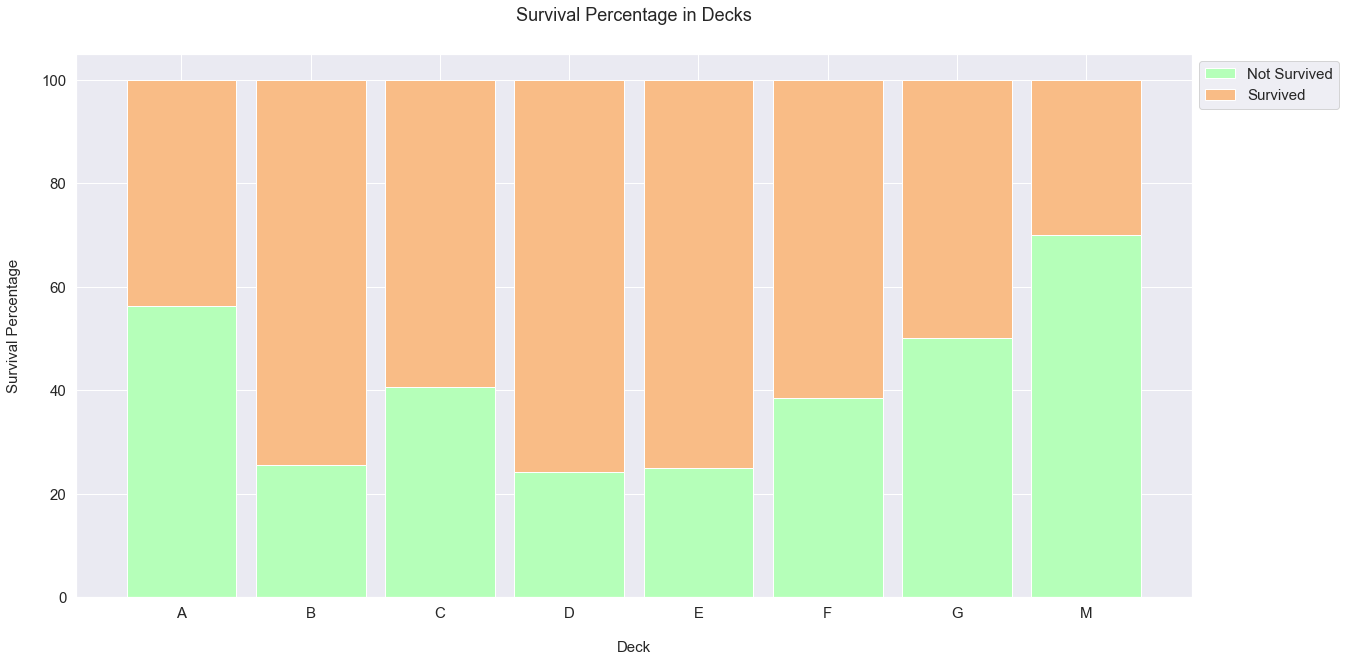

In [133]:
df_all_decks_survived = train_df.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}
    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)


now we can see that the distribution for survival is not even nearly equal for the various deck no. and hence we can come to the conclusion that deck was yet an important factor

In [134]:
train_df['Deck'] = train_df['Deck'].replace(['A', 'B', 'C'], 'ABC')
train_df['Deck'] = train_df['Deck'].replace(['D', 'E'], 'DE')
train_df['Deck'] = train_df['Deck'].replace(['F', 'G'], 'FG')

train_df['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

In [135]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Data_Type', 'Deck'],
      dtype='object')

In [136]:
Cabin_crew = train_df['Deck']

In [137]:
Deck_ = pd.get_dummies(train_df.Deck)
Deck_.columns = ['D1','D2','D3','D4']
Deck_.describe()

,D1,D2,D3,D4
count,891.000000,891.000000,891.000000,891.000000
mean,0.136925,0.072952,0.019080,0.771044
std,0.343961,0.260203,0.136882,0.420397
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [138]:
Deck_

,D1,D2,D3,D4
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,1,0,0,0
888,0,0,0,1
889,1,0,0,0


In [139]:
df_model = pd.concat([df_model,Deck_], axis = 1)

In [140]:
df_model.drop(['D4'], inplace = True,axis = 1)

In [141]:
X = df_model.drop(["Survived"], axis=1)
y = df_model["Survived"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [142]:
#X_train = df_model.copy()

In [143]:
#y_train = df_model['Survived']

In [144]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler
sscaler = StandardScaler()
X_train_ss = sscaler.fit_transform(X_train)
X_test_ss = sscaler.transform(X_test)
qscaler = QuantileTransformer(n_quantiles=100, random_state=43, output_distribution='normal')
X_train_qf = qscaler.fit_transform(X_train)
X_test_qf = qscaler.transform(X_test)
rscaler = RobustScaler(with_scaling=True)
X_train_rs = rscaler.fit_transform(X_train)
X_test_rs = rscaler.transform(X_test)

In [145]:
!pip install lightgbm

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# metric
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=53)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K Nearest Neighbour', KNeighborsClassifier()))
models.append(('Decision Tree', tree.DecisionTreeClassifier(random_state=53)))
models.append(('Random Forest', RandomForestClassifier(random_state=53)))
models.append(('SVC', SVC(probability=True, random_state= 53)))
models.append(("LightGBM", LGBMClassifier(random_state = 53)))

# empty data frame
model_name = []
ss_score = []
qt_score = []
rs_score = []

for name, model in models:
    model_name.append(name)
    cv = cross_val_score(model, X_train_ss, y_train, cv = 5, scoring= "accuracy")
    ss_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_qf, y_train, cv = 5, scoring= "accuracy")
    qt_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_rs, y_train, cv = 5, scoring= "accuracy")
    rs_score.append(np.mean(cv))


model_score = pd.DataFrame(zip(model_name,ss_score, qt_score, rs_score) , columns=['Name', 'Standard Scalar', 'Quantile Transformer', 'Robust Scalar'])

model_score

,Name,Standard Scalar,Quantile Transformer,Robust Scalar
0,Logistic Regression,0.793413,0.797879,0.788901
1,Naive Bayes,0.714039,0.711054,0.714039
2,K Nearest Neighbour,0.787499,0.809954,0.790461
3,Decision Tree,0.814398,0.814398,0.814398
4,Random Forest,0.812905,0.811413,0.812905
5,SVC,0.823387,0.820368,0.820368
6,LightGBM,0.820357,0.820357,0.820357


In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def get_best_param_score(classifier):
    print(classifier.estimator)
    print(classifier.best_score_)
    print(classifier.best_params_)

In [149]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [10, 50, 100, 500, 1000],
                                  'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}

# Randomized search to find approximate good parameters to reduce computation time
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid, cv = 5)
best_clf_rf = clf_rf.fit(X_train_ss,y_train)
get_best_param_score(best_clf_rf)

RandomForestClassifier(random_state=1)
0.8173717876781506
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


In [150]:
param_grid =  {'n_estimators': [70,100,130],'criterion':['entropy'],'bootstrap': [True],'max_depth': [10, 20, 30, 50],'max_features': ['auto','sqrt'],'min_samples_leaf': [3,4,5],'min_samples_split': [4,5,6]}

# parameter search
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True)
best_clf_rf = clf_rf.fit(X_train_ss,y_train)
get_best_param_score(best_clf_rf)

# Fit with best parameter and predict with test
best_svc = best_clf_rf.best_estimator_.fit(X_train_ss, y_train)
y_pred = best_svc.predict(X_test_ss)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
RandomForestClassifier(random_state=1)
0.8188643249915835
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 70}


In [151]:
selected_features = ['Pclass', 'fare bin', 'travel size', 'sex_male', '1_emb', '2_emb','1_bin_age', '2_bin_age', '3_bin_age', 'Other', 'test']

<AxesSubplot:>

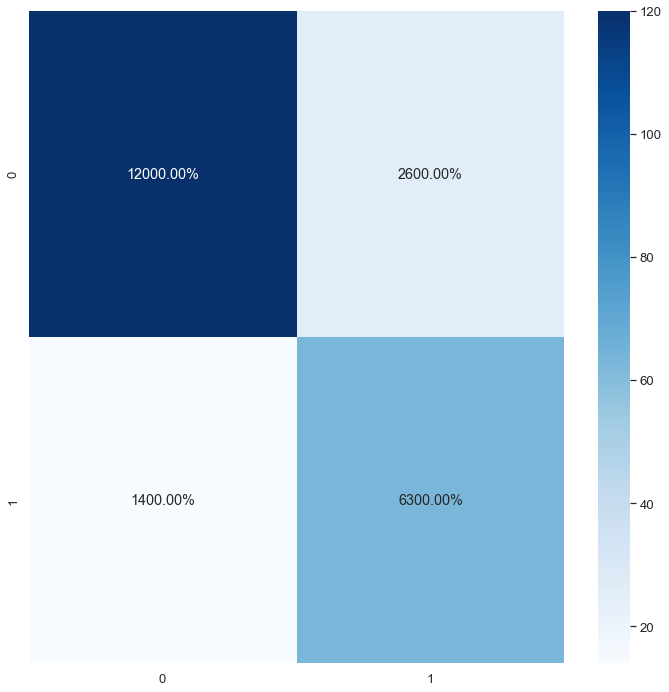

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = selected_features
cm = confusion_matrix(y_pred, y_test)

# then print it in a pretty way
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')

# Conclusion

Here we got an accuracy of nearly 80% for the dataset by handling outliers and taking only required features